<a href="https://colab.research.google.com/github/sujaysavanth/statisticsfordata/blob/main/HypothesisA_Employment_vs_EnergyPerCapita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🔍 Hypothesis A: Does Higher Employment Lead to Higher Per Capita Energy Use?

In this notebook, we test whether counties with higher employment tend to use more energy per person using **simple linear regression**.


R² Score: 0.0338
Coefficient: -0.0000 (MWh per added job)
Intercept: 4.7572


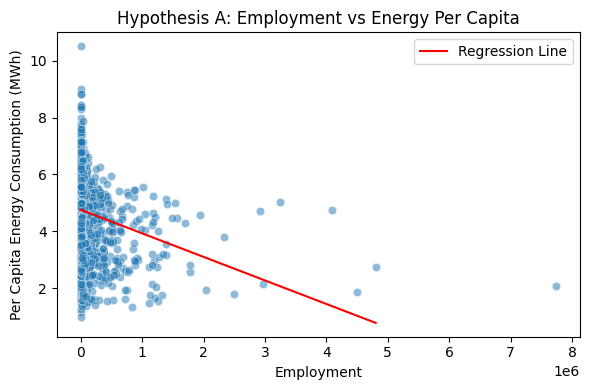

In [2]:
# Install if not already done
!pip install pyxlsb

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load county-level data
file_path = "/content/2016cityandcountyenergyprofiles (1).xlsb"
county_data = pd.read_excel(file_path, engine='pyxlsb', sheet_name='County', skiprows=1)
county_data.columns = county_data.iloc[2]
county_data = county_data.drop([0, 1, 2]).reset_index(drop=True)

# Extract relevant columns
county_df = pd.DataFrame()
county_df['employment'] = pd.to_numeric(county_data['employment'], errors='coerce')

# ✅ Fix: Get first matching column index for 'consumption (MWh/capita)'
mwh_per_capita_index = list(county_data.columns).index('consumption (MWh/capita)')
county_df['energy_per_capita'] = pd.to_numeric(county_data.iloc[:, mwh_per_capita_index], errors='coerce')

# Drop missing data
county_df.dropna(subset=['employment', 'energy_per_capita'], inplace=True)

# Regression: employment → per capita energy
X = county_df[['employment']]
y = county_df['energy_per_capita']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
coef = model.coef_[0]
intercept = model.intercept_

print(f"R² Score: {r2:.4f}")
print(f"Coefficient: {coef:,.4f} (MWh per added job)")
print(f"Intercept: {intercept:,.4f}")

# Visualize
plt.figure(figsize=(6, 4))
sns.scatterplot(x='employment', y='energy_per_capita', data=county_df, alpha=0.5)
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', label='Regression Line')
plt.xlabel("Employment")
plt.ylabel("Per Capita Energy Consumption (MWh)")
plt.title("Hypothesis A: Employment vs Energy Per Capita")
plt.legend()
plt.tight_layout()
plt.show()



## ✅ Conclusion

This regression tests the hypothesis: **Does higher employment lead to higher per capita energy use?**

- The **coefficient** shows how much energy usage increases per additional employed person.
- The **R² score** shows how much of the variation in energy usage is explained by employment.
- This insight can inform **economic development** and **infrastructure planning** at the county level.
